In [3]:
import pandas as pd
import pylab as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [5]:
y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

In [6]:
rs =123

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

In [8]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 5 , min_samples_leaf=1 ,random_state=rs),n_estimators=40,random_state=0,bootstrap=True)

In [9]:
Bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=5,
                                                   random_state=123),
                  n_estimators=40, random_state=0)

In [10]:
preds = Bag.predict(X_test)

In [11]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [12]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.956140350877193,
 'recall': 0.9761904761904762,
 'precision': 0.9111111111111111,
 'f1score': 0.9425287356321839}

In [13]:
from tqdm import tqdm

def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}


def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
             
        
            Bag= BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            
             
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            
            
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()
    
   

100%|██████████| 20/20 [03:54<00:00, 11.75s/it]


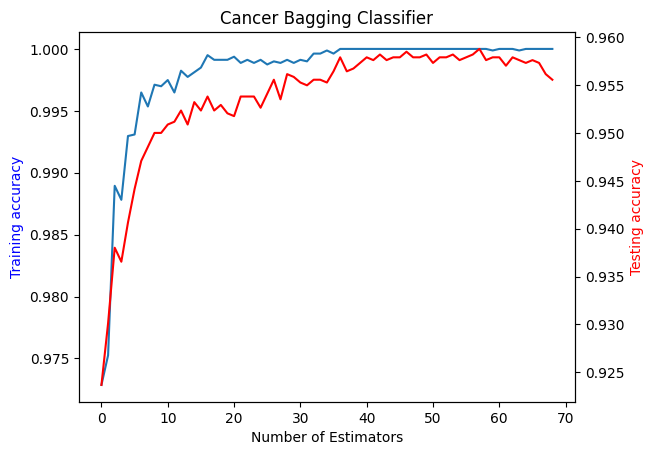

In [23]:
get_accuracy_bag(X, y, "Cancer Bagging Classifier", times=20, xlabel='Number of Estimators')

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [2*n+1 for n in range(40)],
     'estimator__max_depth' : [2*n+1 for n in range(20) ] }
bag = BaggingClassifier(DecisionTreeClassifier(random_state=rs), bootstrap=True, random_state=rs)
search = GridSearchCV(estimator=Bag, param_grid=param_grid,scoring='accuracy', cv=5)
search.fit(X_train, y_train)
print(search.best_params_)

{'estimator__max_depth': 5, 'n_estimators': 21}


In [16]:
search.best_score_

np.float64(0.9648351648351647)

In [19]:
evaluate_metrics(y_test, search.predict(X_test))

{'accuracy': 0.956140350877193,
 'recall': 0.9761904761904762,
 'precision': 0.9111111111111111,
 'f1score': 0.9425287356321839}

In [17]:
from imblearn.over_sampling import  SMOTE
smote_sampler = SMOTE(random_state = 123)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
optimized_model = bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 5 , min_samples_leaf=1 ,random_state=rs),n_estimators=21,random_state=0,bootstrap=True)
optimized_model.fit(X_smo, y_smo)
preds = optimized_model.predict(X_test)

C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [18]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision_test, recall_test, f_beta_test, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
accuracy_test = accuracy_score(y_test, preds)
train_preds = optimized_model.predict(X_train)
precision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average='binary')
accuracy_train = accuracy_score(y_train, train_preds)


print("Test Set Results:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F-Score: {f_beta_test:.2f}")


print("\nTraining Set Results:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F-Score: {f_beta_train:.2f}")

Test Set Results:
Accuracy: 0.94
Precision: 0.87
Recall: 0.98
F-Score: 0.97

Training Set Results:
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F-Score: 0.98
